# Data cleaning in Python Advanced

## Regular Expressions Basic

In [1]:
import pandas as pd
hn = pd.read_csv('hacker_news.csv')

In [2]:
hn.head(10)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48
5,10557283,Nuts and Bolts Business Advice,NaN,3,4,shomberj,11/13/2015 0:45
6,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55
7,11337617,"Shims, Jigs and Other Woodworking Concepts to ...",http://firstround.com/review/shims-jigs-and-ot...,34,7,zt,3/22/2016 16:18
8,10379326,That self-appendectomy,http://www.southpolestation.com/trivia/igy1/ap...,91,10,jimsojim,10/13/2015 9:30
9,11370829,Crate raises $4M seed round for its next-gen S...,http://techcrunch.com/2016/03/15/crate-raises-...,3,1,hitekker,3/27/2016 18:08


Ver cuántas veces se menciona Python o python en los títulos de artículos de Hacker News

In [3]:
import re

titles = hn["title"].tolist()

python_mentions = 0

pattern = '[Pp]ython'

for title in titles:
    if re.search(pattern, title):
        python_mentions += 1
print(python_mentions)

160


Es mejor utilizar métodos vectorizados en pandas .srt.

In [4]:
pattern = '[Pp]ython'

titles = hn['title']

python_mentions =  titles.str.contains(pattern).sum()
print(python_mentions)

160


Los títulos de los artículos que contienen ruby o Ruby

In [5]:
titles = hn['title']

ruby_titles = titles[titles.str.contains('[Rr]uby')]
print(ruby_titles)

190                     Ruby on Google AppEngine Goes Beta
484           Related: Pure Ruby Relational Algebra Engine
1388     Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949     Rewriting a Ruby C Extension in Rust: How a Na...
2022     Show HN: CrashBreak  Reproduce exceptions as f...
2163                   Ruby 2.3 Is Only 4% Faster than 2.2
2306     Websocket Shootout: Clojure, C++, Elixir, Go, ...
2620                       Why Startups Use Ruby on Rails?
2645     Ask HN: Should I continue working a Ruby gem f...
3290     Ruby on Rails and the importance of being stup...
3749     Telegram.org Bot Platform Webhooks Server, for...
3874     Warp Directory (wd) unix command line tool for...
4026     OS X 10.11 Ruby / Rails users can install ther...
4163     Charles Nutter of JRuby Banned by Rubinius for...
4602     Quiz: Ruby or Rails? Matz and DHH were not abl...
5832     Show HN: An experimental Python to C#/Go/Ruby/...
6180     Shrine  A new solution for handling file uploa.

### Quantifiers

![title](imagenes/quantifiers.png)

![title](imagenes/quantifiers_regex.png)

In [6]:
email_bool = titles.str.contains('e-?mail')

email_count = email_bool.sum()

email_titles = titles[email_bool]

print(email_titles)

119      Show HN: Send an email from your shell to your...
313          Disposable emails for safe spam free shopping
1361     Ask HN: Doing cold emails? helps us prove this...
1750     Protect yourself from spam, bots and phishing ...
2421                    Ashley Madison hack treating email
                               ...                        
18098    House panel looking into Reddit post about Cli...
18583    Mailgen  Generates clean, responsive HTML for ...
18847    Show HN: Crisp iOS keyboard for email and text...
19303    Ask HN: Why big email providers don't sign the...
19446    Tell HN: Secure email provider Riseup will run...
Name: title, Length: 86, dtype: object


### Character classes
Permite buscar patrones por clases de caracteres: Números, letras, mayúsculas, minúsculas,..

- We can use a backslash to escape characters that have special meaning in regular expressions (e.g. \ will match an open bracket character).

- Character classes let us match certain groups of characters (e.g. \w will match any word character).

- Character classes can be combined with quantifiers when we want to match different numbers of characters.

![title](imagenes/character_classes.png)

![title](imagenes/character_classes_2.png)

vemos qué títulos tienen "tags", que son palabras entre corchetes [pdf],[video] etc..

In [7]:
pattern = '\[\w{1,}\]'
# pattern = '\[\w+\]' # es lo  mismo

tag_titles = titles[titles.str.contains(pattern)]
tag_count = tag_titles.shape[0]

print(tag_titles)
print(tag_count)

66       Analysis of 114 propaganda sources from ISIS, ...
100      Munich Gunman Got Weapon from the Darknet [Ger...
159           File indexing and searching for Plan 9 [pdf]
162      Attack on Kunduz Trauma Centre, Afghanistan  I...
195                 [Beta] Speedtest.net  HTML5 Speed Test
                               ...                        
19763    TSA can now force you to go through body scann...
19867                       Using Pony for Fintech [video]
19947                                Swift Reversing [pdf]
19979    WSJ/Dowjones Announce Unauthorized Access Betw...
20089    Users Really Do Plug in USB Drives They Find [...
Name: title, Length: 444, dtype: object
444


### Capture groups

Cuando ponemos un \ con un caracter estamos utilizando secuencias de escape y puede ser difícil buscar strings que ya tienen \, se puede poner \\ pero es mejor utilizar **raw strings**

Capture groups allow us to specify one or more groups within our match that we can access separately.

Lo que se ponga entre paréntesis es el capture group y es lo que extrae

In [8]:
pattern = r"\[(\w+)\]"

# Si no se pone expand = False, devuelve un DataFrame en vez de un Series y value_counts da error
tag_freq = titles.str.extract(pattern, expand = False).value_counts()
print(tag_freq)

pdf            276
video          111
audio            3
2015             3
2014             2
beta             2
slides           2
Live             1
viz              1
GOST             1
1996             1
Excerpt          1
SPA              1
survey           1
Skinnywhale      1
CSS              1
NSFW             1
transcript       1
satire           1
Petition         1
Python           1
Beta             1
JavaScript       1
German           1
HBR              1
song             1
Australian       1
React            1
updated          1
5                1
comic            1
gif              1
detainee         1
Videos           1
repost           1
ANNOUNCE         1
videos           1
Ubuntu           1
SpaceX           1
Map              1
png              1
map              1
Challenge        1
coffee           1
2008             1
ask              1
USA              1
Infograph        1
Benchmark        1
much             1
blank            1
crash            1
Name: title,

In [9]:
pattern = r"(\[\w+\])"

# Si no se pone expand = False, devuelve un DataFrame en vez de un Series y value_counts da error
tag_freq = titles.str.extract(pattern, expand = False).value_counts()
print(tag_freq)

[pdf]            276
[video]          111
[2015]             3
[audio]            3
[slides]           2
[2014]             2
[beta]             2
[Excerpt]          1
[HBR]              1
[song]             1
[updated]          1
[coffee]           1
[2008]             1
[transcript]       1
[Beta]             1
[SpaceX]           1
[blank]            1
[comic]            1
[survey]           1
[SPA]              1
[videos]           1
[Infograph]        1
[satire]           1
[CSS]              1
[German]           1
[Videos]           1
[Petition]         1
[much]             1
[detainee]         1
[Australian]       1
[ANNOUNCE]         1
[JavaScript]       1
[5]                1
[gif]              1
[Benchmark]        1
[USA]              1
[Map]              1
[png]              1
[1996]             1
[Python]           1
[React]            1
[repost]           1
[Challenge]        1
[GOST]             1
[Skinnywhale]      1
[viz]              1
[map]              1
[crash]      

### Negative Character classes
Para hacer patrones más complejos.
One way to do this is by using negative character classes. Negative character classes are character classes that match every character except a character class.

Es útil utilizar herramientas como https://regexr.com/

![title](imagenes/negative_character_classes.png)

Por ejemplo si queremos los títulos con java o Java pero no los que tengan Jjavascript

In [10]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10


pattern = r'[Jj]ava[^Ss]'

print(first_10_matches(pattern))


436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
2910                2016 JavaOne Intel Keynote  32mn Talk
3452    What are the Differences Between Java Platform...
Name: title, dtype: object


In [11]:

java_titles = titles[titles.str.contains(pattern)]

### Word boundaries

En el ejemplo anterior si un título acaba con Java o java tampoco cumpliría la regex y no se incluiría en la lista.

Para esto son útiles los límites de word **\b**

word boundary anchor matches the space between a word character and a non-word character. More generally in regular expressions, an anchor matches something that isn't a character, as opposed to character classes which match specific characters.

![title](imagenes/word_boundary_anchor.png)

In [12]:
pattern = r'\b[Jj]ava\b'

print(first_10_matches(pattern))

java_titles = titles[titles.str.contains(pattern)]

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
3228                              Comparing Rust and Java
3452    What are the Differences Between Java Platform...
Name: title, dtype: object


### Anchors

An anchor matches something that isn't a character, as opposed to character classes which match specific characters.

![title](imagenes/beg_end_anchors.png)

Note that the ^ character is used both as a beginning anchor and to indicate a negative set, depending on whether the character preceding it is a [ or not.

ver si los títulos de los artículos empiezan o terminan con tags []

In [13]:
beginning_count = titles[titles.str.contains(r'^\[\w+\]')].shape[0]
print(beginning_count)

ending_count = titles[titles.str.contains(r'\[\w+\]$')].shape[0]
print(ending_count)

15
417


### Flags

We can use flags to specify that our regular expression should ignore case.

Both re.search() and the pandas regular expression methods accept an optional flags argument. This argument accepts one or more flags, which are special variables in the re module that modify the behavior of the regex interpreter.

A list of all available flags is in the documentation, but by far the most common and the most useful is the re.IGNORECASE flag, which is also available using the alias re.I for convenience.

In [14]:
import re

email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])
print(email_tests.str.contains(r'\be[\-\s]?mails?\b', flags =re.I).sum())

email_mentions = titles.str.contains(r'\be[\-\s]?mails?\b', flags =re.I).sum()
print(email_mentions)

12
141


## Advanced Regular Expressions

### Flags

Para no poner cosas como **pattern = r"[Ss][Qq][Ll]"** se puede usar la flag Ignorecase re.Ignorecase ó re.I

In [15]:
import pandas as pd
import re

hn = pd.read_csv("hacker_news.csv")
titles = hn['title']
# In our dataset, the SQL language has three different capitalizations: SQL, sql, and Sql.
sql_counts = titles.str.contains(r'sql', flags = re.I).sum()
print(sql_counts)

108


Podemos extraer los flavors de sql, ya que en general sql viene precedido por una palabra (flavor)

In [16]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()

hn_sql['flavor'] = hn['title'].str.extract(r"(\w+SQL)", flags=re.I, expand = False).str.lower()
# Si no pongo expand= false, extract genera un dataframe en vez de una series y da error

sql_pivot = hn_sql.pivot_table(index = 'flavor', values = 'num_comments', aggfunc = 'mean')

Extraer las versiones de Python.

Se busca Python seguido de números con puntos intercalados pero solo se extrae la versión.

Se puede generar una tabla de frecuencias con el comando dict sobre la salida de un value_counts()

In [17]:
pattern = r"[Pp]ython ([\d\.]+)"

py_versions = titles.str.extract(pattern, expand = False)
py_versions_freq = dict(py_versions.value_counts())
print(py_versions.value_counts())
print(py_versions_freq)

3        10
2         3
3.5       3
3.6       2
3.5.0     1
1.5       1
8         1
4         1
2.7       1
Name: title, dtype: int64
{'3': 10, '2': 3, '3.5': 3, '3.6': 2, '3.5.0': 1, '1.5': 1, '8': 1, '4': 1, '2.7': 1}


Buscando títulos con C pero descartando C++ ó C.E.O.

In [18]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

pattern = r"\b[Cc]\b[^\.\+]"

first_ten = first_10_matches(pattern)
print(first_ten)

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object


### Lookarounds

Sirven para mirar antes o después de lo que queremos encontrar. Para descartar C++ o Series C por ejemplo si buscamos C.



![title](imagenes/lookarounds.png)

These tips can help you remember the syntax for lookarounds:

- Inside the parentheses, the first character of a lookaround is always ?.
- If the lookaround is a lookbehind, the next character will be <, which you can think of as an arrow head pointing behind the match.
- The next character indicates whether the lookaround is positive (=) or negative (!).


In [19]:
pattern = r'(?<![Ss]eries\s)\b[Cc]\b((?![.+])|\.$)'

# el | es un OR -> ((?![.+])|\.$) es no está seguida de + ó . OR tiene un punto \. y es final de string

c_mentions = titles.str.contains(pattern).sum()
print(c_mentions)

102


C:\Users\adrig\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Backreferences
Hacen referencia a algún Capture group que se haya definido.
Se pueden utilizar para buscar palabras repetidas por ejemplo

![title](imagenes/backreferences.png)

Buscamos títulos con palabras repetidas:

Write a regular expression to match cases of repeated words:
- We'll define a word as a series of one or more word characters preceded and followed by a boundary anchor.
- We'll define repeated words as the same word repeated twice, separated by a single whitespace character.

In [20]:
repeated_words = titles[titles.str.contains(r'\b(\w+)\s\1\b')]
print(repeated_words)

3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object


### Substitución de un pattern

When we learned to work with basic string methods, we used the str.replace() method to replace simple substrings. We can achieve the same with regular expressions using the re.sub() function. The basic syntax for re.sub() is:

re.sub(pattern, repl, string, flags=0)

In [21]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])


email_uniform = email_variations.str.replace(r'\be[-\s]?mail', 'email', flags = re.I)
titles_clean = titles.str.replace(r'\be[-\s]?mail', 'email', flags = re.I)
print(email_uniform)

0    email
1    email
2    email
3    email
4    email
5    email
6    email
7    email
8    email
dtype: object


### Extrayendo dominios de URLs

A partir de la barra / no se considera dominio, es path.

/ no entra en ([\w\-\.]+)

In [22]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])


pattern = r'https?://([\w\-\.]+)'

test_urls_clean = test_urls.str.extract(pattern, expand = False, flags = re.I)
print(test_urls_clean)

0                      www.amazon.com
1     www.interactivedynamicvideo.com
2                     www.nytimes.com
3                       evonomics.com
4                          github.com
5                            phys.org
6                        iot.seeed.cc
7                    www.bfilipek.com
8               beta.crowdfireapp.com
9                        www.valid.ly
10          css-cursor.techstream.org
dtype: object


In [23]:
domains = hn['url'].str.extract(pattern, expand = False, flags = re.I)

# haciendo una tabla de frecuencia con value_counts
top_domains = domains.value_counts().head(5)
print(top_domains)

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: url, dtype: int64


### Extraer varias 

Se pueden asignar varios grupos de captura para generar una columna por cada grupo.

Por ejemplo separar el protocolo, el dominio y la ruta

![title](imagenes/url_parts.png)

In [24]:

pattern = r'(https?)://([\w\.\-]+)/?(.*)'

test_url_parts = test_urls.str.extract(pattern, flags = re.I, expand = False)

url_parts = hn['url'].str.extract(pattern, flags = re.I, expand = False)
url_parts.head(20)

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,http,firstround.com,review/shims-jigs-and-other-woodworking-concep...
8,http,www.southpolestation.com,trivia/igy1/appendix.html
9,http,techcrunch.com,2016/03/15/crate-raises-4m-seed-round-for-its-...


#### Asignar nombre a cada columna extraida con cada capture group
In order to name a capture group we use the syntax ?P<name>, where name is the name of our capture group. This syntax goes after the open parentheses, but before the regex syntax that defines the capture group:

![title](imagenes/name_capture.png)

In [25]:
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"

url_parts = hn['url'].str.extract(pattern, flags = re.I, expand = False)

url_parts.head()

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


## List Comprehensions and Lambda Functions

In this mission, we'll learn some tips and syntax shortcuts we can use on top of everything we've learned, including:

- Creating list comprehensions to replace loops with a single line of code.
- Creating single use functions called lambda functions.

The data set we'll use in this mission is in a format called JavaScript Object Notation (JSON). As the name indicates, JSON originated from the JavaScript language, but has now become a language-independent format.

El modulo json de python permite trabajar más fácilmente con objetos JSON.

Desde el punto de vista de Python JSON se puede considerar unas coleccioes de objetos anidadas unas dentro de otras.

Por ejemplo: Una lista de diccionarios.


In [26]:
json_string = """
[
  {
    "name": "Sabine",
    "age": 36,
    "favorite_foods": ["Pumpkin", "Oatmeal"]
  },
  {
    "name": "Zoe",
    "age": 40,
    "favorite_foods": ["Chicken", "Pizza", "Chocolate"]
  },
  {
    "name": "Heidi",
    "age": 40,
    "favorite_foods": ["Caesar Salad"]
  }
]
"""

import json
json_obj = json.loads(json_string)
print(type(json_obj))
print(json_obj)

<class 'list'>
[{'name': 'Sabine', 'age': 36, 'favorite_foods': ['Pumpkin', 'Oatmeal']}, {'name': 'Zoe', 'age': 40, 'favorite_foods': ['Chicken', 'Pizza', 'Chocolate']}, {'name': 'Heidi', 'age': 40, 'favorite_foods': ['Caesar Salad']}]


El JSON de arriba es una lista, en que cada elemento de la lista es un diccionario. Cada diccionarie tiene las mismas entradas y cada valor de cada entrada es otra lista.

- The formatting from our original string is gone. This is because printing Python lists and dictionaries has a simple formatting structure.
- The order of the keys in the dictionary have changed. This is because (prior to version 3.6) Python dictionaries don't have fixed order.

In [27]:
world_cup_str = """
[
    {
        "team_1": "France",
        "team_2": "Croatia",
        "game_type": "Final",
        "score" : [4, 2]
    },
    {
        "team_1": "Belgium",
        "team_2": "England",
        "game_type": "3rd/4th Playoff",
        "score" : [2, 0]
    }
]
"""

import json

world_cup_obj = json.loads(world_cup_str)

### Abrir archivos .json

En vez de json.loads(..) es json.load(..).

La s es de string

In [28]:
file = open('hn_2014.json')
hn = json.load(file)

print(type(hn))

<class 'list'>


In [29]:
print(len(hn))

35806


In [30]:
print(type(hn[0]))

<class 'dict'>


In [31]:
print(hn[0].keys())

dict_keys(['author', 'numComments', 'points', 'url', 'storyText', 'createdAt', 'tags', 'createdAtI', 'title', 'objectId'])


Coincide con las columnas del arhcivo equivalente de hacker news pero en csv.

### Función dumps

Es lo contrario a loads.

Convierte un objeto json en una string.

Atención al jprint y no print para mostrar bien un objeto json

In [32]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

first_story = hn[0]
jprint(first_story)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


### Eliminar keys de los diccionarios dentro del objeto json

In [33]:
def del_key(dict_, key):
    # create a copy so we don't
    # modify the original dict
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict


hn_clean = []

for element in hn:
    hn_clean.append(del_key(element, 'createdAtI'))

### List comprehensions

Simplifican la aplicación de funciones sobre listas.

List comprehensions can be used for many different things. Three common applications are:

- Transforming a list
- Creating a new list
- Reducing a list


![title](imagenes/list_comprehensions.png)

#### Transforming a list

In [34]:
letters = ['a', 'b', 'c', 'd']

caps = []
for l in letters:
    caps.append(l.upper())
    
print(caps)

['A', 'B', 'C', 'D']


In [35]:
caps = [l.upper() for l in letters]
print(caps)

['A', 'B', 'C', 'D']


Para eliminar la key como hemos hecho antes con el dataset de hackernews

In [36]:
hn_clean = [del_key(element, 'createdAtI') for element in hn]

#### Creating a list

In [37]:
import pandas as pd
import numpy as np

cols = ["col_{}".format(i) for i in range(1,5)]
data = np.zeros((4,4))

df = pd.DataFrame(data, columns=cols)
print(df)

   col_1  col_2  col_3  col_4
0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0


Extraer todas las urls del dataset y crear una lista

In [38]:
urls = [element['url'] for element in hn_clean]
print(urls[:10])

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy', 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot', 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971', 'http://alexsblog.org/2014/05/29/dont-wait-for-inspiration/', 'http://techcrunch.com/2014/05/28/hackerone-get-9m-in-series-a-funding-to-build-bug-tracking-bounty-programs/', 'http://www.teslamotors.com/en_AU/models/design', 'http://gearapp.challengepost.com/', 'https://gigaom.com/2014/05/28/skype-will-soon-get-real-time-speech-translation-based-on-deep-learning/', 'http://www.nbcnews.com/feature/edward-snowden-interview/watch-primetime-special-inside-mind-edward-snowden-n117126', 'http://snippetrepo.com/snippets/linear-equation-solver-in-3-lines-of-python']


#### Reducing a list

In [39]:
has_comments = []

for d in hn_clean:
    if d['numComments'] > 0:
        has_comments.append(d)

num_comments = len(has_comments)
print(num_comments)

9279


In [40]:
has_comments = [d for d in hn_clean if d['numComments'] > 0]

num_comments = len(has_comments)
print(num_comments)

9279


In [41]:
thousand_points = [d for d in hn_clean if d['points'] > 1000]
num_thousand_points = len(thousand_points)
print(num_thousand_points)

8


### Prebuilt functions en json objects

min, max mean

Se le tiene que pasar una key, que es una función que definamos para mirar una determinada columna.

En python se pueden pasar funciones como variables si se quitan los paréntesis



In [42]:
def greet():
    return "hello"

greet()

'hello'

In [43]:
t = type(greet())
print(t)

<class 'str'>


In [44]:
t = type(greet)
print(t)

<class 'function'>


In [45]:
greet_2 = greet

greet_2()

'hello'

Diccionario dentro del json object con el mayor número de comentarios

In [46]:
def get_num_comments(json_dict):
    return json_dict['numComments']

most_comments = max(hn_clean, key = get_num_comments)
print(most_comments)

{'author': 'platz', 'numComments': 1208, 'points': 889, 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/', 'storyText': None, 'createdAt': '2014-04-03T19:02:53Z', 'tags': ['story', 'author_platz', 'story_7525198'], 'title': 'Brendan Eich Steps Down as Mozilla CEO', 'objectId': '7525198'}


In [47]:
jprint(most_comments)

{
    "author": "platz",
    "createdAt": "2014-04-03T19:02:53Z",
    "numComments": 1208,
    "objectId": "7525198",
    "points": 889,
    "storyText": null,
    "tags": [
        "story",
        "author_platz",
        "story_7525198"
    ],
    "title": "Brendan Eich Steps Down as Mozilla CEO",
    "url": "https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/"
}


### lambda functions
Python provides a special syntax to create temporary functions for situations like these. These functions are called lambda functions. Lambda functions can be defined in a single line, which allows you to define a function you want to pass as an argument at the time you need it.

![title](imagenes/lambda_1.png)

![title](imagenes/lambda_2.png)

![title](imagenes/lambda_3.png)

In [48]:
def extract_and_increment(string):
    digits = re.search(r"\d+", string).group()
    incremented = int(digits) + 1
    return incremented

In [49]:
extract_and_increment('a4f7r4')

5

In [50]:
extract_and_increment = lambda string: int(re.search(r"\d+", string).group()) + 1

In [51]:
extract_and_increment('a4f7r4')

5

#### Min, Max y sorted con lambda

### Min

![title](imagenes/min_lambda.png)

### Max

![title](imagenes/max_lambda.png)

### Sorted

![title](imagenes/sorted_lambda.png)

Ordenar el dataset por numero de puntos

In [52]:
hn_sorted_points = sorted(hn_clean, key= lambda dict: dict['points'], reverse = True)

jprint(hn_sorted_points[:5])

[
    {
        "author": "frederfred",
        "createdAt": "2014-03-10T15:44:42Z",
        "numComments": 398,
        "objectId": "7373566",
        "points": 2732,
        "storyText": "",
        "tags": [
            "story",
            "author_frederfred",
            "story_7373566"
        ],
        "title": "2048",
        "url": "http://gabrielecirulli.github.io/2048/"
    },
    {
        "author": "brokenparser",
        "createdAt": "2014-02-11T08:12:28Z",
        "numComments": 260,
        "objectId": "7216471",
        "points": 1958,
        "storyText": "",
        "tags": [
            "story",
            "author_brokenparser",
            "story_7216471"
        ],
        "title": "Today is The Day We Fight Back",
        "url": "https://thedaywefightback.org/"
    },
    {
        "author": "jamesbritt",
        "createdAt": "2014-01-19T22:46:05Z",
        "numComments": 308,
        "objectId": "7086411",
        "points": 1522,
        "storyText": null,
   

List comprehension para sacar las títulos de los más altos en puntos

In [53]:
top_5_titles = [d['title'] for d in hn_sorted_points[0:5]]
jprint(top_5_titles)

[
    "2048",
    "Today is The Day We Fight Back",
    "Wozniak: \u201cActually, the movie was largely a lie about me\u201d",
    "Microsoft Open Sources C# Compiler",
    "Elon Musk: To the People of New Jersey"
]


### Pandas y json

Se puede trabajar directamente con pandas importando el json object en un dataframe.

Cada diccionario de la lista que es el json object será una columna.

![title](imagenes/pandas_json.png)

In [54]:
# json_obj definido casi al principio de list comprehensions y lambda functions
json_df = pd.DataFrame(json_obj)
print(json_df)

     name  age               favorite_foods
0  Sabine   36           [Pumpkin, Oatmeal]
1     Zoe   40  [Chicken, Pizza, Chocolate]
2   Heidi   40               [Caesar Salad]


In [55]:
import pandas as pd
hn_df = pd.DataFrame(hn_clean)
hn_df.head(10)

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,"[story, author_jcr, story_7815234]",Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,"[story, author_callum85, story_7815230]",Apple Agrees to Buy Beats for $3 Billion,7815230
3,d3v3r0,0,1,http://alexsblog.org/2014/05/29/dont-wait-for-...,,2014-05-29T08:00:08Z,"[story, author_d3v3r0, story_7815222]",Don’t wait for inspiration,7815222
4,timmipetit,0,1,http://techcrunch.com/2014/05/28/hackerone-get...,,2014-05-29T07:46:19Z,"[story, author_timmipetit, story_7815191]",HackerOne Get $9M In Series A Funding To Build...,7815191
5,thetron,0,2,http://www.teslamotors.com/en_AU/models/design,,2014-05-29T07:41:30Z,"[story, author_thetron, story_7815179]",Tesla Model S pricing for Australia,7815179
6,rajeevk,0,1,http://gearapp.challengepost.com/,,2014-05-29T07:34:31Z,"[story, author_rajeevk, story_7815165]",Samsung gear app challenge,7815165
7,etiam,0,2,https://gigaom.com/2014/05/28/skype-will-soon-...,,2014-05-29T07:24:12Z,"[story, author_etiam, story_7815144]",Skype will soon get real-time speech translati...,7815144
8,bsimpson,0,4,http://www.nbcnews.com/feature/edward-snowden-...,,2014-05-29T07:16:26Z,"[story, author_bsimpson, story_7815134]",NBC News interview of Ed Snowden [video],7815134
9,signa11,0,2,http://snippetrepo.com/snippets/linear-equatio...,,2014-05-29T07:01:18Z,"[story, author_signa11, story_7815095]",Linear equation solver in 3 lines of Python,7815095


Hay columnas como tags que tiene  listas de varios elementos.
Comprobamos cuántas elementos tienen todas para eliminar la columna total o parcialmente

In [56]:
tags = hn_df['tags']
print(tags.dtype)

object


In [57]:
tags_types = tags.apply(type)
type_counts = tags_types.value_counts(dropna=False)
print(type_counts)

<class 'list'>    35806
Name: tags, dtype: int64


In [58]:
tags_types = tags.apply(len)
type_lengths = tags_types.value_counts(dropna=False)
print(type_lengths)

3    33459
4     2347
Name: tags, dtype: int64


Vemos que hay muchas menos entradas de 4 elementos.
Creamos una másk y las seleccionamos

In [59]:
tags = hn_df['tags']

four_tags = tags[tags.apply(len) == 4]
print(four_tags)

43       [story, author_alamgir_mand, story_7813869, sh...
86         [story, author_cweagans, story_7812404, ask_hn]
104      [story, author_nightstrike789, story_7812099, ...
107      [story, author_ISeemToBeAVerb, story_7812048, ...
109         [story, author_Swizec, story_7812018, show_hn]
                               ...                        
35747      [story, author_rpm4321, story_6994970, show_hn]
35759            [story, author_ct, story_6994828, ask_hn]
35778    [story, author_ChrisNorstrom, story_6994370, a...
35787    [story, author_benjamincburns, story_6994163, ...
35792      [story, author_randall, story_6993981, show_hn]
Name: tags, Length: 2347, dtype: object


Parece que cuando hay 4 la información que sobra es el último elemento de la lista

#### Ternary operators

![title](imagenes/ternary_operator.png)

In [60]:
cleaned_tags = tags.apply(lambda element: element[-1] if len(element) == 4 else None)
hn_df['tags'] = cleaned_tags
hn_df

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,None,Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,None,Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,None,Apple Agrees to Buy Beats for $3 Billion,7815230
3,d3v3r0,0,1,http://alexsblog.org/2014/05/29/dont-wait-for-...,,2014-05-29T08:00:08Z,None,Don’t wait for inspiration,7815222
4,timmipetit,0,1,http://techcrunch.com/2014/05/28/hackerone-get...,,2014-05-29T07:46:19Z,None,HackerOne Get $9M In Series A Funding To Build...,7815191
...,...,...,...,...,...,...,...,...,...
35801,lispython,0,3,https://medium.com/p/ff5f4c9b16bd,None,2014-01-01T00:33:42Z,None,Engelbart and Kay,6993601
35802,co_pl_te,0,3,http://allthingsd.com/20131231/you-say-goodbye...,,2014-01-01T00:19:47Z,None,You Say Goodbye and We Say Hello,6993568
35803,maurorm,0,1,http://ghiraldelli.pro.br/jesus-e-eu/,None,2014-01-01T00:11:06Z,None,Jesus e eu,6993544
35804,yeukhon,0,1,,https:&#x2F;&#x2F;fundraising.mozilla.org&#x2F;,2014-01-01T00:06:59Z,None,Mozilla end-of-year fundraising jumps from $75...,6993536


## Working with missing data

Aprender a trabajar con datos incompletos sin eliminar columnas o filas

Recordamos cómo contar datos incompletos.

In [61]:
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[.3, .7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

     A   B   C
0  NaN NaN NaN
1  1.0 NaN NaN
2  1.0 NaN NaN


In [62]:
print(df.isnull())

       A     B     C
0   True  True  True
1  False  True  True
2  False  True  True


In [63]:
print(df.isnull().sum())

A    1
B    3
C    3
dtype: int64


El resultado de esto es una serie

Ahora para el dataset de motor vehicle collisions released by New York City and published on the NYC OpenData website.

In [64]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")


null_counts = mvc.isnull().sum()
print(null_counts)

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64


Porcentaje de null en cada columna

In [65]:
null_counts_pct = null_counts / mvc.shape[0] * 100
print(null_counts_pct)

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64


In [66]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


In [67]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


Vemos que aunque no haya null en cada sumando, el total si tiene algún null.
En vez de eliminar la columna podemos repararla.
Sumamos las tres columnas primeras y enmascaramos para ver en qué casos no se corresponde el resultado con la columna de total_killed

In [68]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]

### Series.mask()

Para sustituir datos según una máscara en una serie

![title](imagenes/mask.png)

En el data set de los accidentes hay algunas filas que en el total tienen NaN y otras que tienen un número distinto a la suma.

Los que tienen NaN en el total se ponen con la suma de las tres primeras columnas.
Los que tienen un valor incorrecto se pone NaN porque es posible que sean datos erróneos.

In [69]:
# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)


Se hace lo mismo para las columnas de injured

In [70]:

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

Podemos ver el cambio de antes y despúes generando un dataframe así:

In [71]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
pd.DataFrame(summary, index=['before','after'])

,injured,killed
before,1,5
after,21,1


Lo asignamos al dataframe original

In [72]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

### Heatmap para ver los missing values fácilmente

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(df_null, cbar=False, yticklabels=False)
    #En dataquest el dataframe está negado pero aquí el color sale al revés de lo que se pretende
    #sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

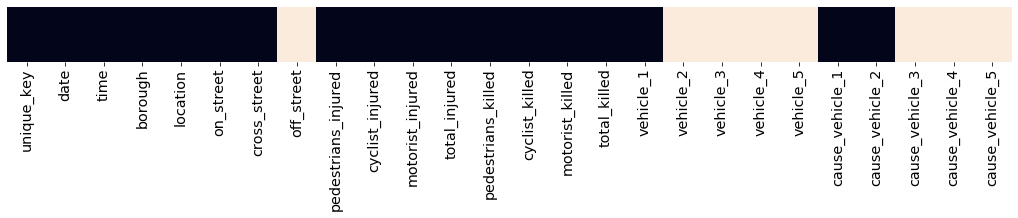

In [75]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

Esta es la misma fila pero con los datos reales

In [76]:
mvc.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


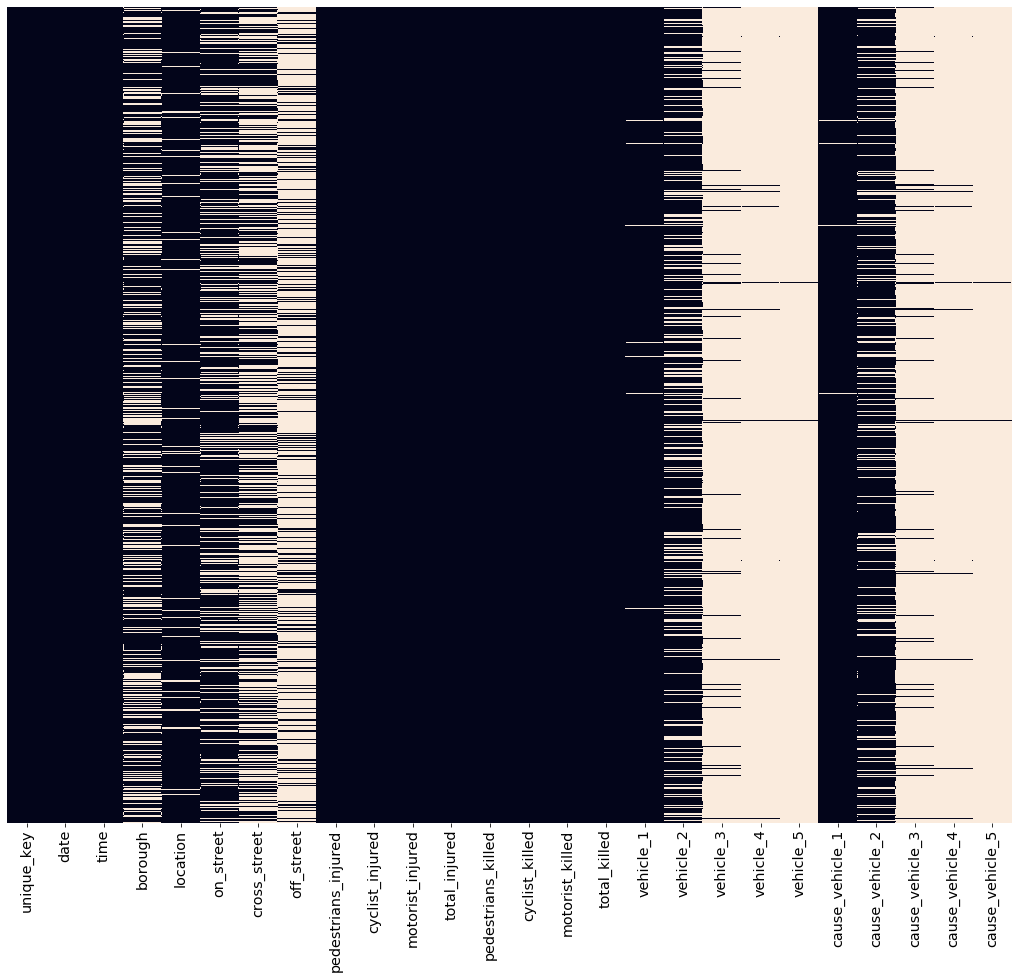

In [77]:
plot_null_matrix(mvc)

We can make some immediate interpretations about our dataframe:

- The first three columns have few to no missing values.
- The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.
- The next eight columns are the injury and killed columns we just cleaned, and only have a few missing values.
- The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.


### Matriz de correlación
Podemos estudiar la relación entre las columnas con la matriz de correlacion

In [78]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


In [79]:
type(missing_corr)

pandas.core.frame.DataFrame

In [80]:
cols_with_missing_vals

Index(['borough', 'location', 'on_street', 'cross_street', 'off_street',
       'total_injured', 'total_killed', 'vehicle_1', 'vehicle_2', 'vehicle_3',
       'vehicle_4', 'vehicle_5', 'cause_vehicle_1', 'cause_vehicle_2',
       'cause_vehicle_3', 'cause_vehicle_4', 'cause_vehicle_5'],
      dtype='object')

In [81]:
mvc[cols_with_missing_vals].isnull()

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,False,False,False,False,True,False,False,False,True,True,True,True,False,False,True,True,True
1,False,False,False,False,True,False,False,False,False,True,True,True,False,False,True,True,True
2,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True
3,False,False,False,False,True,False,False,False,False,True,True,True,False,False,True,True,True
4,False,False,True,True,False,False,False,False,False,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57859,False,False,False,False,True,False,False,False,True,True,True,True,False,True,True,True,True
57860,False,False,False,False,True,False,False,False,False,True,True,True,False,False,True,True,True
57861,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True
57862,True,False,False,True,True,False,False,False,False,False,True,True,False,False,False,True,True


Vemos la correlacion entre las 10 últimas columnas, las que tienen vehicle de una manera mucho menos sobrecargada

In [82]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()    


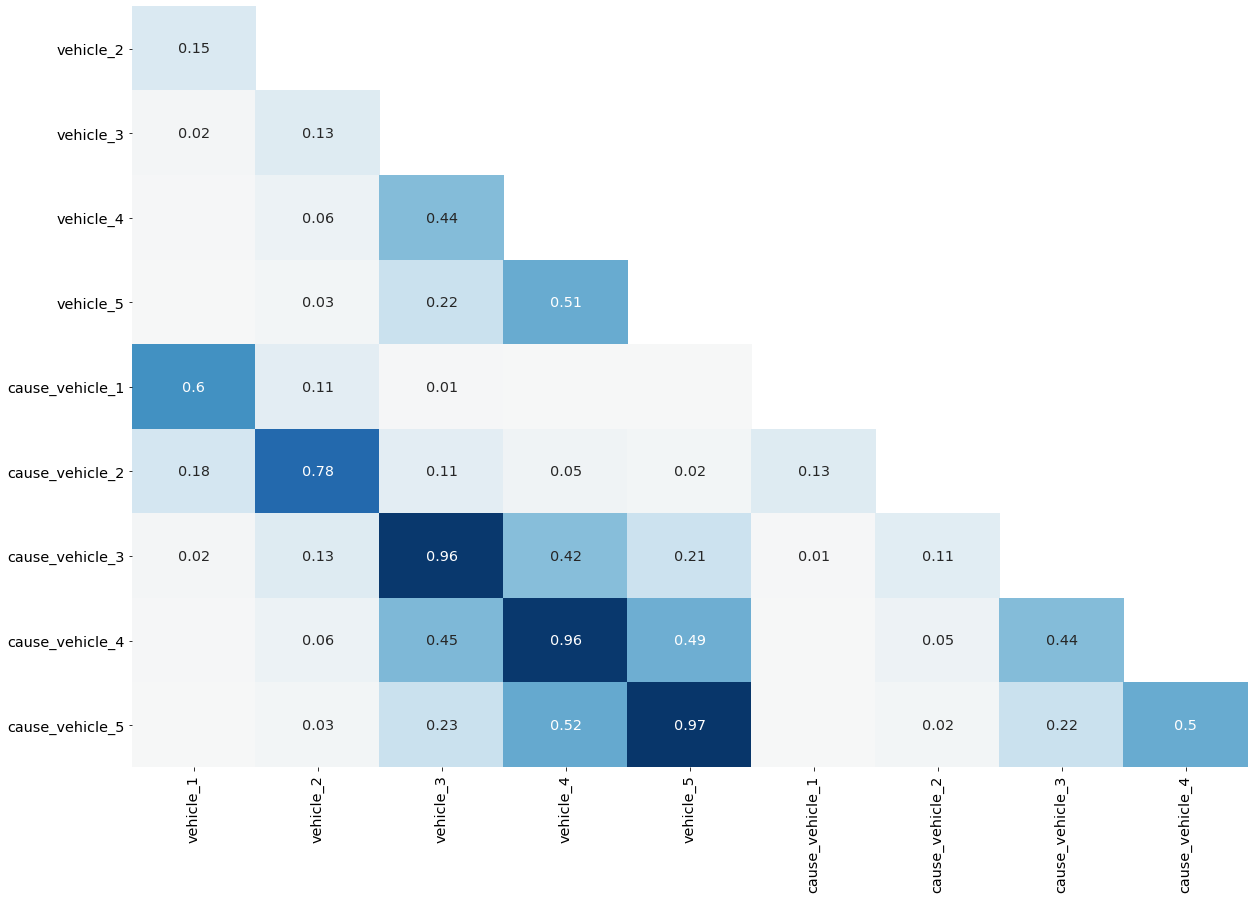

In [83]:
veh_cols = [col for col in mvc.columns if 'vehicle' in col]

plot_null_correlations(mvc[veh_cols])

#### Analizando lo que hace la función
Selecciona lo que tiene valores nulos

In [84]:
cols_with_missing_vals =  mvc[veh_cols].columns[ mvc[veh_cols].isnull().sum() > 0]
cols_with_missing_vals

Index(['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5',
       'cause_vehicle_1', 'cause_vehicle_2', 'cause_vehicle_3',
       'cause_vehicle_4', 'cause_vehicle_5'],
      dtype='object')

Hace la correlación entre columnas en función de sus valores nulos

In [85]:
missing_corr =  mvc[veh_cols][cols_with_missing_vals].isnull().corr()
missing_corr

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
vehicle_1,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067
vehicle_4,0.008732,0.057631,0.437214,1.000000,0.506810,0.006121,0.046727,0.423394,0.963723,0.515058
vehicle_5,0.004425,0.029208,0.221585,0.506810,1.000000,0.003102,0.023682,0.214580,0.490537,0.973664
cause_vehicle_1,0.604281,0.106214,0.014000,0.006121,0.003102,1.000000,0.131000,0.014457,0.006324,0.003186
cause_vehicle_2,0.180678,0.784402,0.106874,0.046727,0.023682,0.131000,1.000000,0.110362,0.048277,0.024322
cause_vehicle_3,0.020624,0.132499,0.961316,0.423394,0.214580,0.014457,0.110362,1.000000,0.437440,0.220384
cause_vehicle_4,0.009022,0.058050,0.448525,0.963723,0.490537,0.006324,0.048277,0.437440,1.000000,0.503805
cause_vehicle_5,0.004545,0.029264,0.225067,0.515058,0.973664,0.003186,0.024322,0.220384,0.503805,1.000000


Elimina la primera fila y la última columna de la matriz de correlación

In [86]:
missing_corr = missing_corr.iloc[1:, :-1]
missing_corr

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4
vehicle_2,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050
vehicle_3,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525
vehicle_4,0.008732,0.057631,0.437214,1.000000,0.506810,0.006121,0.046727,0.423394,0.963723
vehicle_5,0.004425,0.029208,0.221585,0.506810,1.000000,0.003102,0.023682,0.214580,0.490537
cause_vehicle_1,0.604281,0.106214,0.014000,0.006121,0.003102,1.000000,0.131000,0.014457,0.006324
cause_vehicle_2,0.180678,0.784402,0.106874,0.046727,0.023682,0.131000,1.000000,0.110362,0.048277
cause_vehicle_3,0.020624,0.132499,0.961316,0.423394,0.214580,0.014457,0.110362,1.000000,0.437440
cause_vehicle_4,0.009022,0.058050,0.448525,0.963723,0.490537,0.006324,0.048277,0.437440,1.000000
cause_vehicle_5,0.004545,0.029264,0.225067,0.515058,0.973664,0.003186,0.024322,0.220384,0.503805


Hace una máscara para aplicar el heatmap después sobre solo el triángulo inferior de la matriz, quitando la diagonal.
En seaborn la mask del heatmap no devuelve donde la mask sea True.

In [87]:
mask = np.triu(np.ones_like(missing_corr), k=1)
mask

array([[0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [88]:
mask2 = np.triu(np.ones_like(missing_corr), k=0)
mask2

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [89]:
mask3 = np.triu(np.ones_like(missing_corr), k=-1)
mask3

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.]])

Volviendo al heatmap con las correlaciones se puede ver que lo más correlacionado son los vehículos con sus causas.

Ahora hacemos una tabla con:

- Veces que falta vehiculo 1 pero hay causa de vehiculo 1
- Veces que falta causa de vehiculo 1 pero hay vehiculo 1
- ..

E igual para el resto

In [90]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[v_col].notnull() & mvc[c_col].isnull()).sum()
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns = col_labels)
    

In [91]:
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


Se ve que hay unos 4000 valores de vehículo que faltan. Esto es algo que no se puede imputar como hemos hehco antes de manera numérica.

Para no eliminar tantos valores (10% del total casi) podemos imputarlo con el valor más común.

Para ello podemos utiliza rla función **dataframe.stack()** y luego **series.value_counts()** para ver el tipod e vehículo más común en las 5 columnas de vehículo.

![title](imagenes/stack_1.png)

![title](imagenes/stack_2.png)

In [92]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]

vehicles = mvc[v_cols]

vehicles_1d = vehicles.stack()
vehicles_1d


0      vehicle_1                      PASSENGER VEHICLE
1      vehicle_1          SPORT UTILITY / STATION WAGON
       vehicle_2                                     DS
2      vehicle_1    Station Wagon/Sport Utility Vehicle
       vehicle_2                                  Sedan
                                   ...                 
57862  vehicle_1                                  Sedan
       vehicle_2                   Tractor Truck Diesel
       vehicle_3    Station Wagon/Sport Utility Vehicle
57863  vehicle_1                          Pick-up Truck
       vehicle_2    Station Wagon/Sport Utility Vehicle
Length: 107512, dtype: object

In [93]:
top10_vehicles = vehicles_1d.value_counts().head(10)

top10_vehicles


Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

Podemos hacer lo mismo con las causas

In [94]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


In [95]:
cause_1d = cause.stack()
cause_1d.head()

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object

In [96]:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
top10_causes

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

Ahora imputamos las filas que:

- falta vehiculo y hay causa con vehículo 'Unspecified'
- falta causa y hay vehículo con causa 'Unspecified'

In [97]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

In [98]:
summary_before = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [99]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    # Se crean las máscaras con las condiciones que digo antes
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[v_col].notnull() & mvc[c_col].isnull()
    
    # se enmascara cada columna de vehículo y cada columna de causa
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, 'Unspecified')
    
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, 'Unspecified')

In [100]:
summary_after = summarize_missing()
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


Ahora vemos la matriz de correlación desués de efectuar nuestros cambios

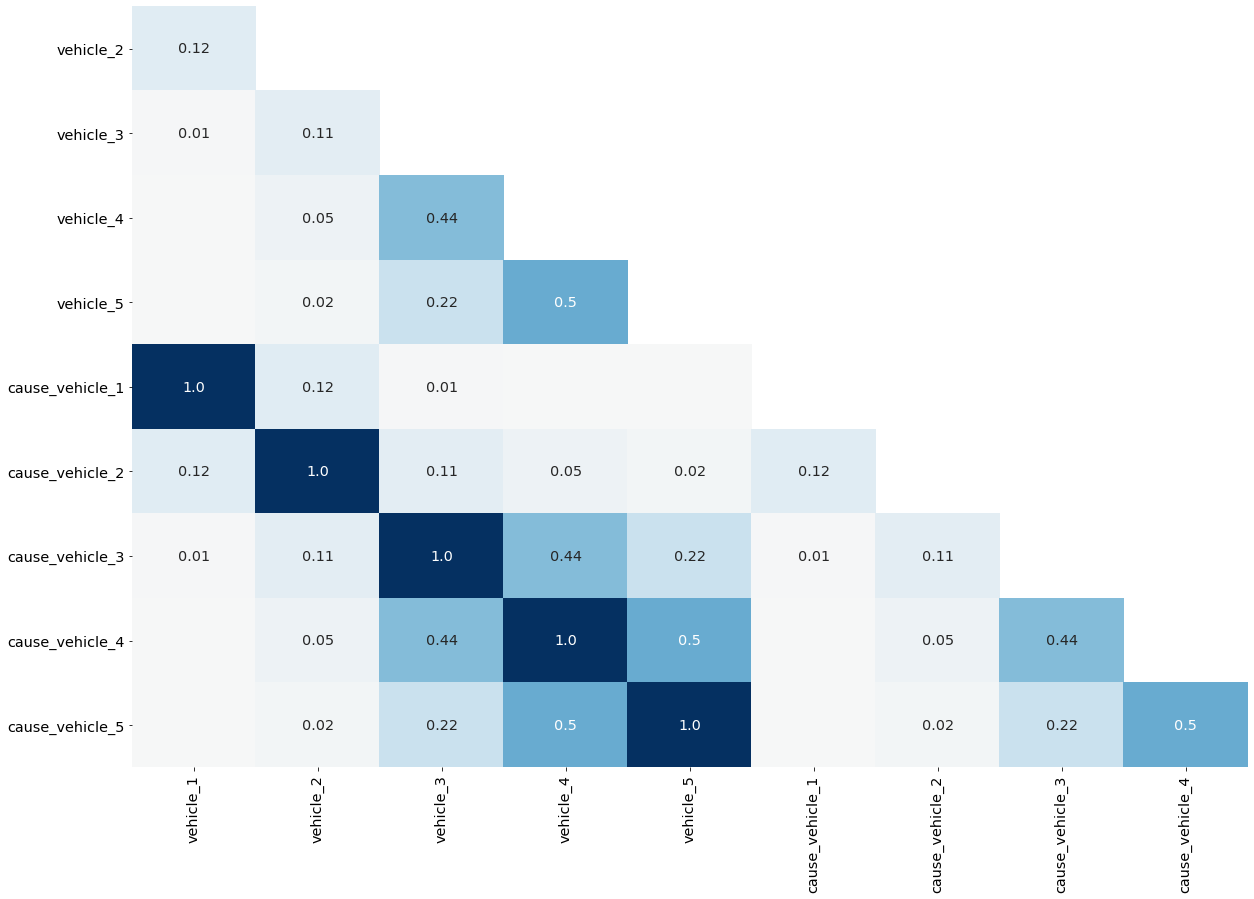

In [101]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

Se puede ver ya la correlación perfecta entre la causa y la existencia de vehículo

Ahora nos centramos en el resto de columnas que también tienen entradas con null, como las de la ubicación del accidente

In [111]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [112]:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


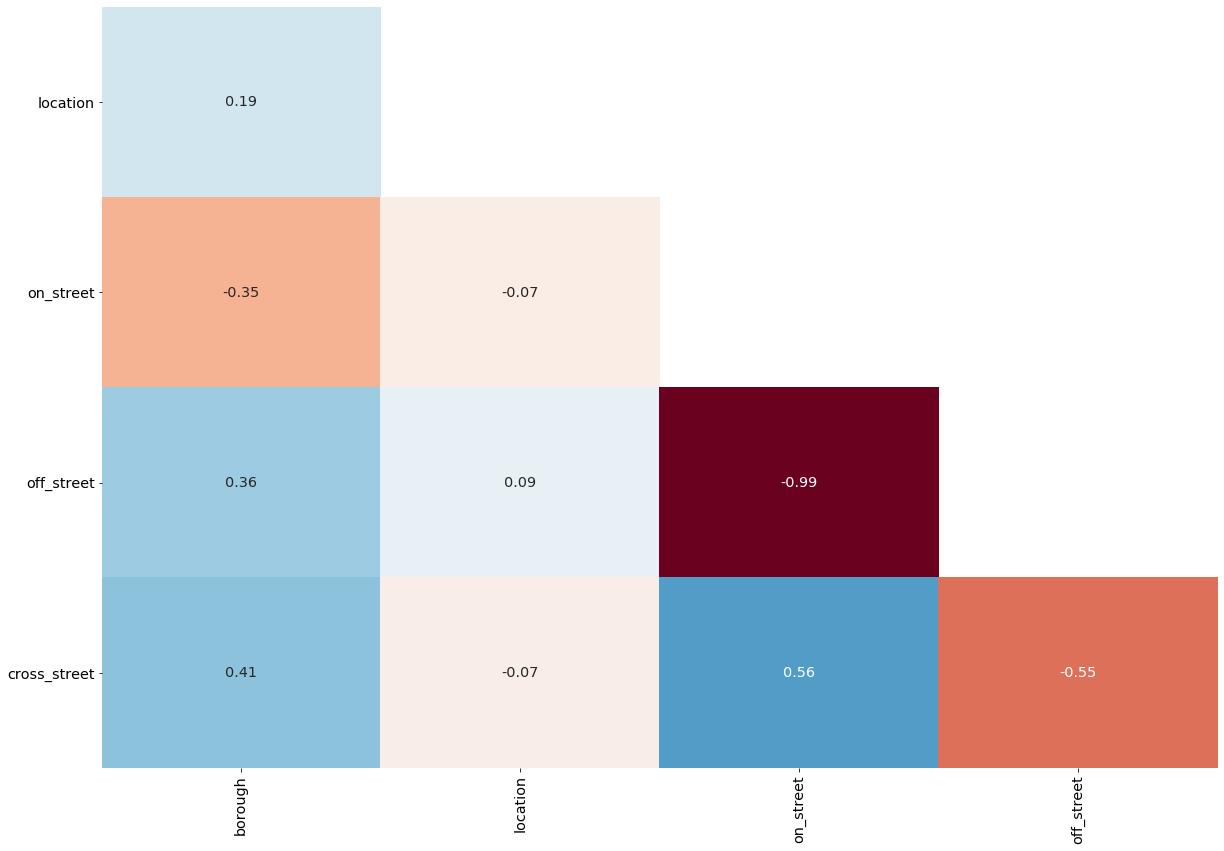

In [113]:
plot_null_correlations(location_data)

Off_street y on_street tienen correlación negativa casi perfecta. Lo que quiere decir que cuando uno es null el otro no.

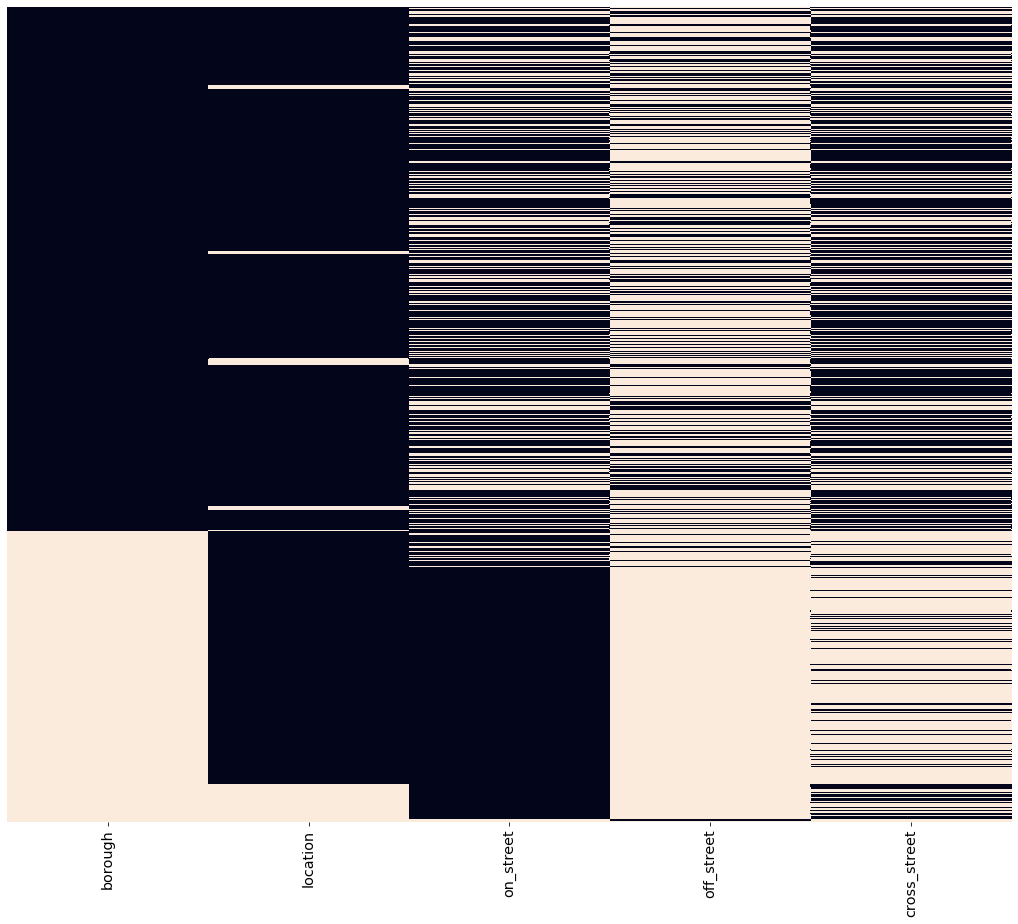

In [114]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

In [115]:
sorted_location_data

,borough,location,on_street,off_street,cross_street
4195,BRONX,"(40.543148, -74.147026)",NaN,4278 3 AVENUE,NaN
28739,BRONX,"(40.597343, -74.07097)",EAST 183 STREET,NaN,VALENTINE AVENUE
1222,BRONX,"(40.666126, -73.82518)",JEROME AVENUE,NaN,EAST MOUNT EDEN AVENUE
51319,BRONX,"(40.70715, -73.906586)",NaN,3989 SAXON AVENUE,NaN
47683,BRONX,"(40.71259, -73.81541)",NaN,875 MORRISON AVENUE,NaN
...,...,...,...,...,...
54230,NaN,NaN,NaN,NaN,NaN
54885,NaN,NaN,NaN,NaN,NaN
55580,NaN,NaN,NaN,NaN,NaN
56407,NaN,NaN,NaN,NaN,NaN


Un tercio de las filas de borough son  null, y la mayoría de éstas son non-null en location y alguna columna con street.

La décima parte de location tienen null, pero no tienen null en columnas con street.

La mayoriía de columnas tienen un non-null en alguna street.

Se pueden imputar valores que faltan con otras columnas y alguna API de geolocalización.

### Imputando con datos suplemetarios de API de geoloc

Para filas con valores de location pero sin borough ostreet, usamos API GeoPy para mirar las coordenadas de location para encontrar los datos qu faltan.

Para filas con valores de street y sin borough y location utilizamos la API para mirar la dirección

In [118]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head(20)

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN
5,3987177,NaN,NaN,1115 5TH AVENUE,MANHATTAN
6,4008417,NaN,NaN,NaN,NaN
7,3917518,NaN,NaN,806 3RD AVENUE,BROOKLYN
8,3953286,NaN,NaN,NaN,NaN
9,3896388,NaN,NaN,NaN,NaN


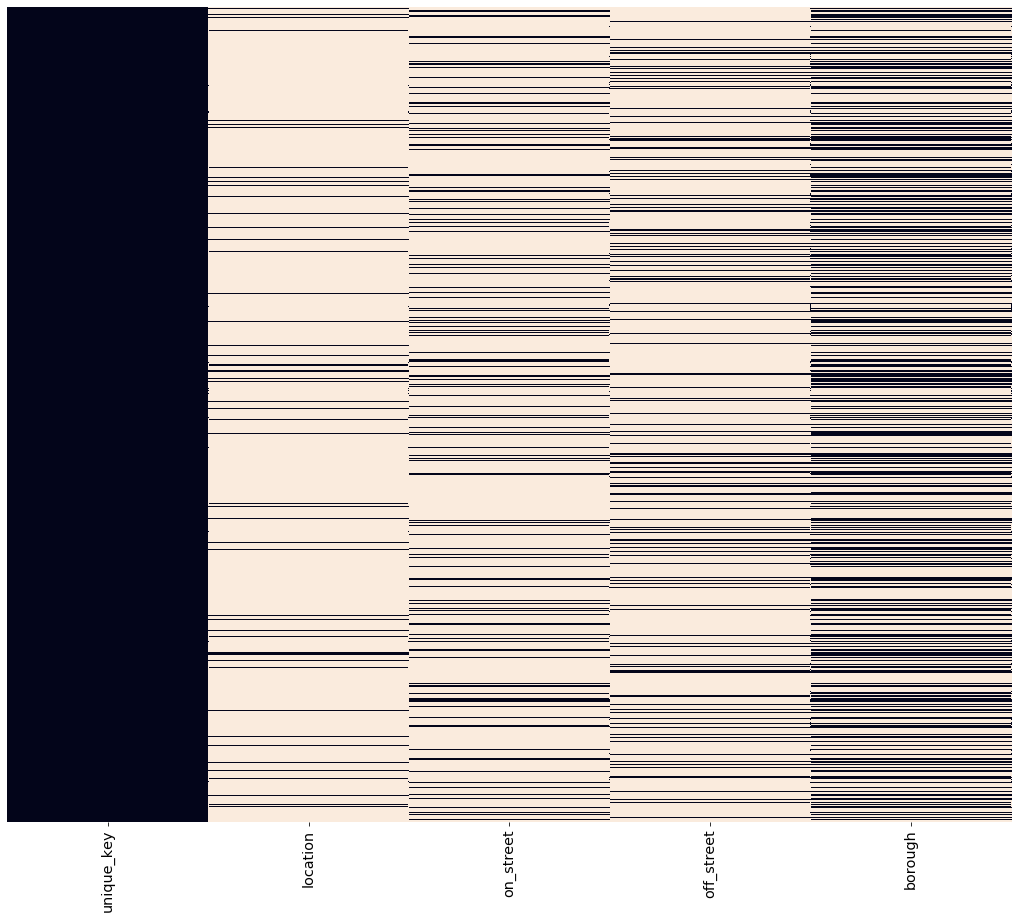

In [119]:
plot_null_matrix(sup_data)

La unique_key tiene los mismos valores en mvc que en sup_data para poder hacer mascaras bien

In [120]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


In [121]:
sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()

for col in location_cols:
    if mvc[col].isnull().sum() > 0:
        mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])
        
null_after = mvc[location_cols].isnull().sum()

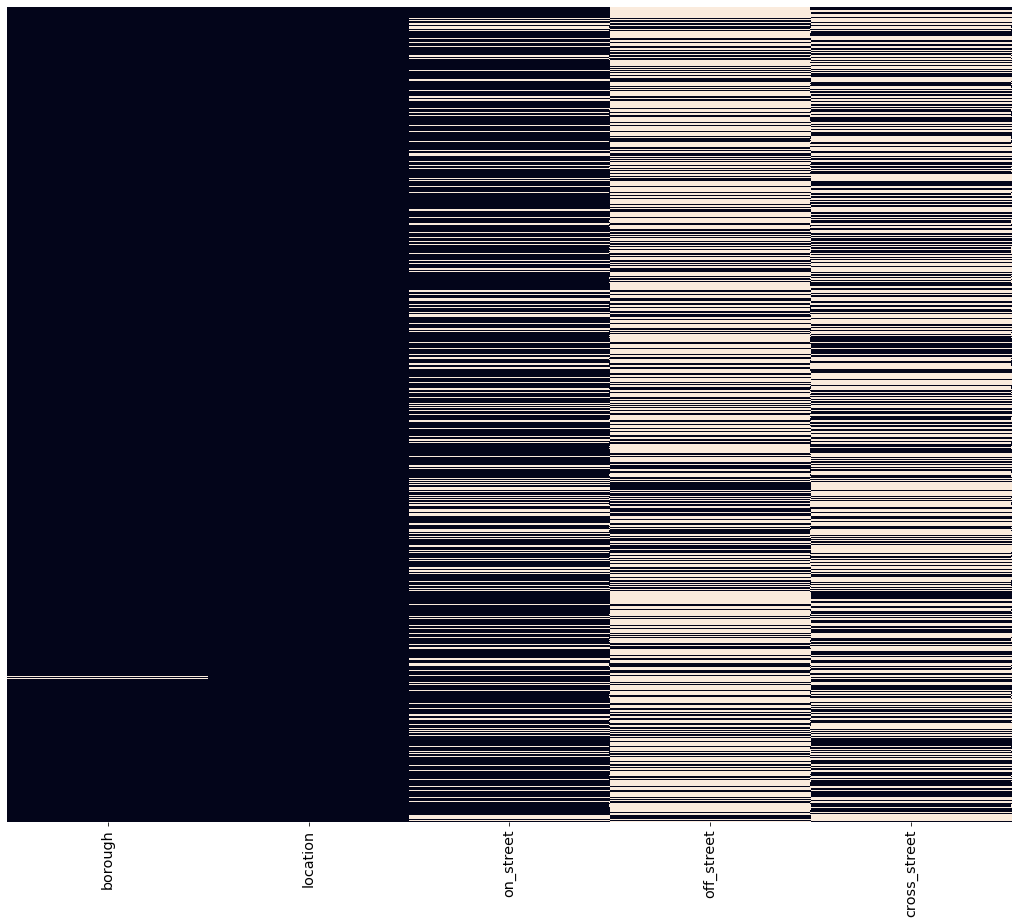

In [122]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
plot_null_matrix(location_data)